## Install needed libraries

In [ ]:
# ! pip install -r requirements.txt

## Import libraries

In [80]:
import nltk
import spacy
from textblob import TextBlob
import os
import fitz
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

## Extract text from pdf

In [2]:
def extract_text(pdf_path):
    doc = fitz.open(pdf_path) # return pages
    full_text = ""
    for page in doc: # each page
        full_text += page.get_text()+"\n" 
    return full_text.strip()

# Extract text from all Resumes and add to array

In [3]:
dataset_path = r'D:\ResumeDataset\dataset'
resume_texts = []
job_categories = []
for job in os.listdir(dataset_path):
    job_path = os.path.join(dataset_path, job) 
    for resume in os.listdir(job_path):
        resume_path = os.path.join(job_path, resume)
        resume_text = extract_text(resume_path)
        resume_texts.append(resume_text)
        job_categories.append(job)

# Dataframe

In [23]:
df = pd.DataFrame({"Category":job_categories,"Text":resume_texts})
df.head()

Category                                               Text
0  ACCOUNTANT  ACCOUNTANT\nSummary\nFinancial Accountant spec...
1  ACCOUNTANT  STAFF ACCOUNTANT\nSummary\nHighly analytical a...
2  ACCOUNTANT  ACCOUNTANT\nProfessional Summary\nTo obtain a ...
3  ACCOUNTANT  SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...
4  ACCOUNTANT  SENIOR ACCOUNTANT\nProfessional Summary\nSenio...

# Check missing values, duplicate

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2484 non-null   object
 1   Text      2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


# check dublicate

In [77]:
df[df.duplicated()]

Category                                               Text
620   AVIATION  STOREKEEPER II\nProfessional Summary\nThe purp...
1643   FINANCE  FINANCE OFFICER\nProfessional Summary\nTo atta...

In [78]:
df = df.drop_duplicates()

# Data Preprocessing

In [81]:
LEMMATIZER = WordNetLemmatizer() # initialize the lemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
def preprocess(txt):
    txt = txt.lower()
    # Remove non-English characters, punctuation, and numbers
    txt = re.sub(r'[^a-zA-Z]', ' ', txt)
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    tokens = word_tokenize(txt)
    filtered_tokens = []
    for word in tokens:
        if word not in stopwords.words('english'):
            filtered_tokens.append(LEMMATIZER.lemmatize(word))

    return ' '.join(filtered_tokens)

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_17416\1533944732.py:5: SyntaxWarning: invalid escape sequence '\s'
  txt = re.sub('\s+', ' ', txt)  # remove extra whitespace


# replace the old text with the new processed one

In [89]:
df['Text'] = df['Text'].apply(lambda w: preprocess(w))

In [90]:
df.head()

Category                                               Text
0  ACCOUNTANT  accountant summary financial accountant specia...
1  ACCOUNTANT  staff accountant summary highly analytical det...
2  ACCOUNTANT  accountant professional summary obtain positio...
3  ACCOUNTANT  senior accountant experience company name june...
4  ACCOUNTANT  senior accountant professional summary senior ...

# Visualization

In [91]:
df['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
FITNESS                   117
FINANCE                   117
SALES                     116
AVIATION                  116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

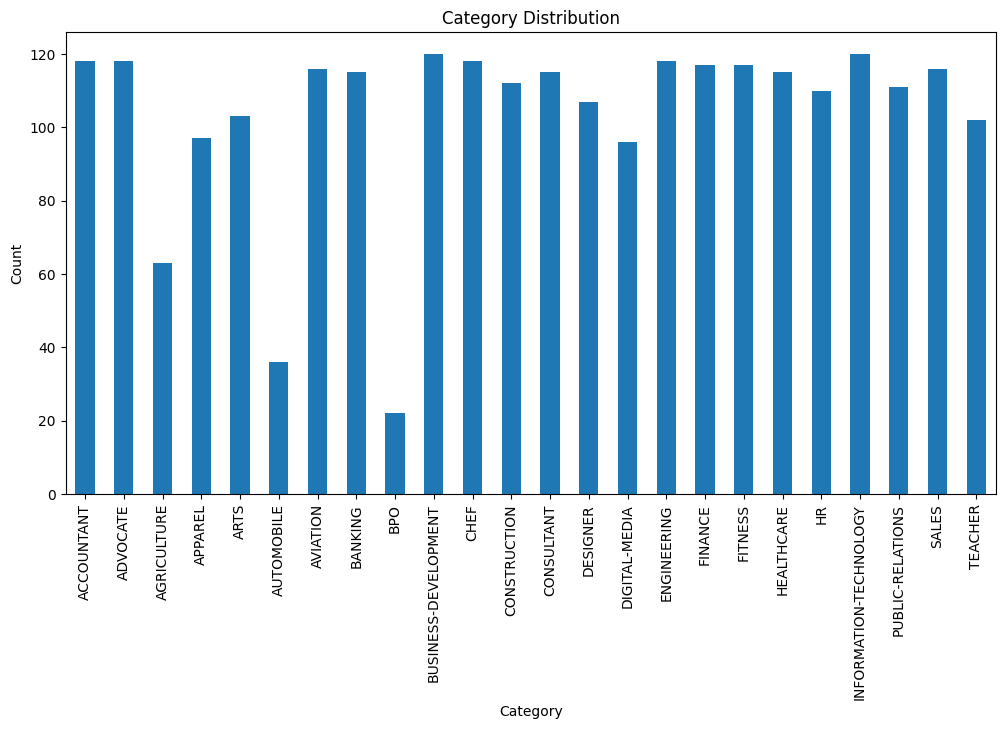

In [92]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution")
plt.show()

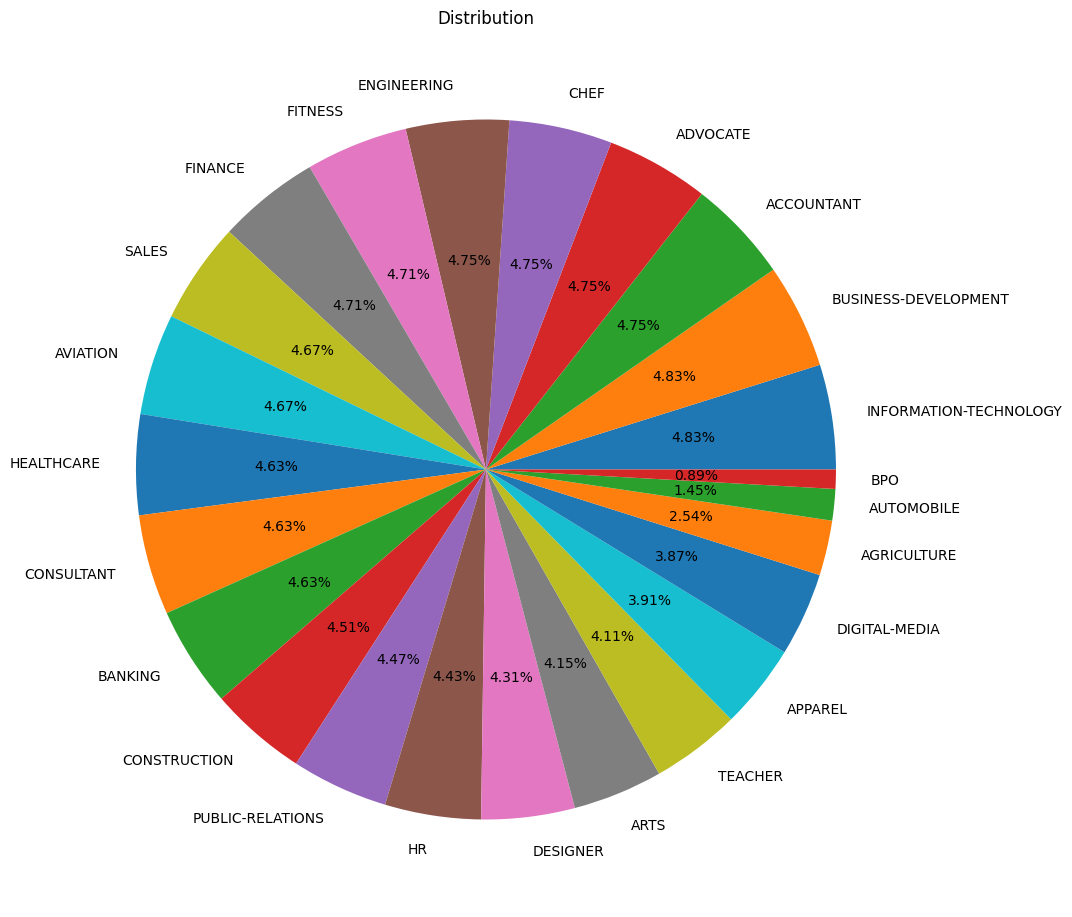

In [93]:
count=df['Category'].value_counts()
label=df['Category'].value_counts().keys()

plt.figure(1, figsize=(25,25))
grid=GridSpec(2,2)

cmap=plt.get_cmap('coolwarm')

color=[cmap(i) for i in np.linspace(0, 1, 5)]
plt.subplot(grid[0,1], aspect=1, title='Distribution')

plt.pie(count, labels=label, autopct='%1.2f%%')
plt.show()

In [94]:
categories = np.sort(df['Category'].unique())
print(categories)

['ACCOUNTANT' 'ADVOCATE' 'AGRICULTURE' 'APPAREL' 'ARTS' 'AUTOMOBILE'
 'AVIATION' 'BANKING' 'BPO' 'BUSINESS-DEVELOPMENT' 'CHEF' 'CONSTRUCTION'
 'CONSULTANT' 'DESIGNER' 'DIGITAL-MEDIA' 'ENGINEERING' 'FINANCE' 'FITNESS'
 'HEALTHCARE' 'HR' 'INFORMATION-TECHNOLOGY' 'PUBLIC-RELATIONS' 'SALES'
 'TEACHER']


In [95]:
df_categories = [df.loc[df['Category'] == category, ['Category','Text']].reset_index(drop=True) for category in categories]
df_categories[0]

Category                                               Text
0    ACCOUNTANT  accountant summary financial accountant specia...
1    ACCOUNTANT  staff accountant summary highly analytical det...
2    ACCOUNTANT  accountant professional summary obtain positio...
3    ACCOUNTANT  senior accountant experience company name june...
4    ACCOUNTANT  senior accountant professional summary senior ...
..          ...                                                ...
113  ACCOUNTANT  accountant summary self motivated accountant o...
114  ACCOUNTANT  general accountant career focus obtain positio...
115  ACCOUNTANT  senior accountant summary highly competent mot...
116  ACCOUNTANT  principal accountant summary capable accountan...
117  ACCOUNTANT  payroll accountant summary strong work ethic y...

[118 rows x 2 columns]

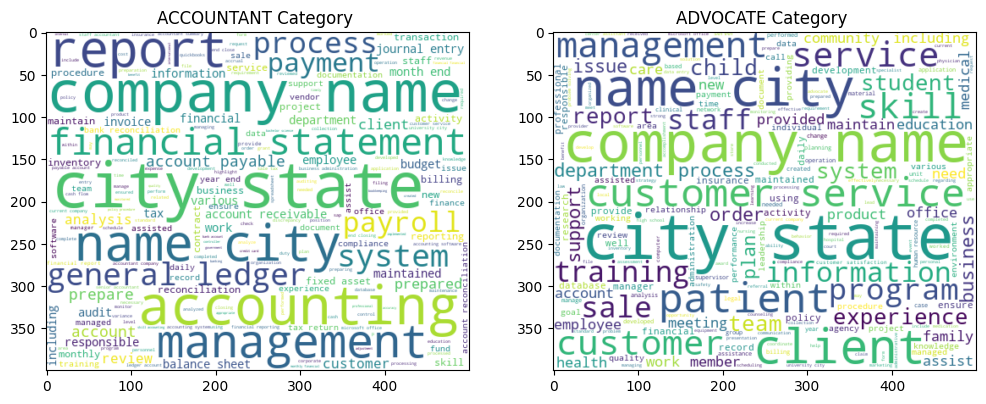

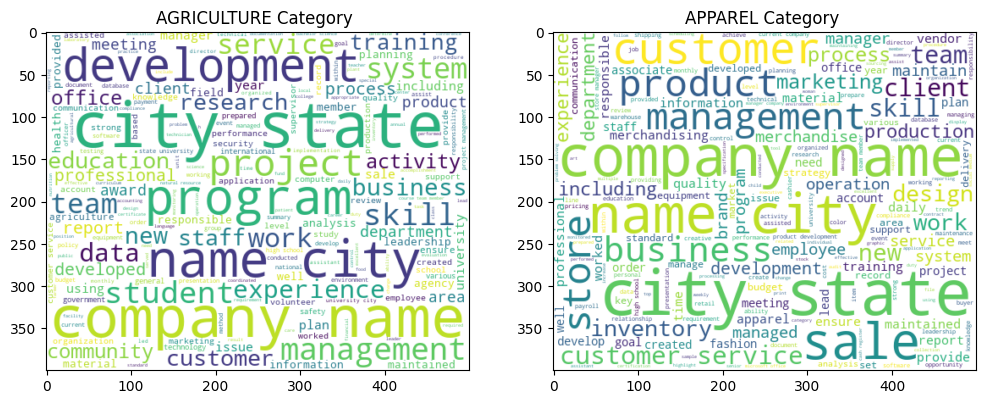

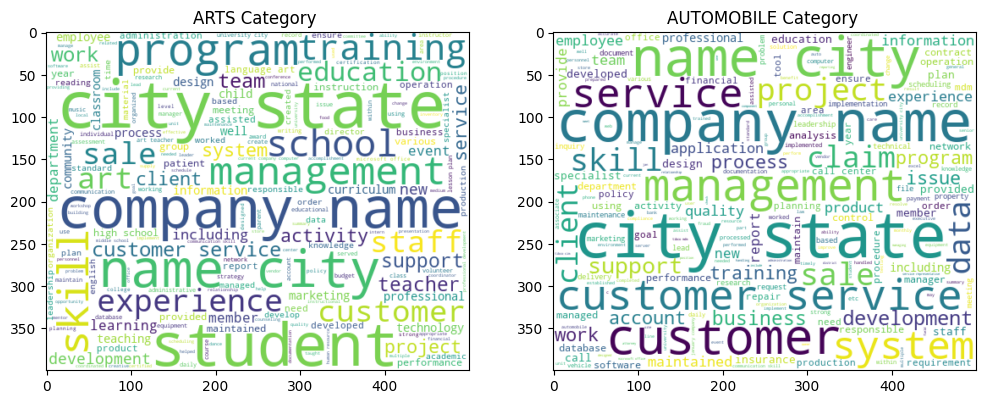

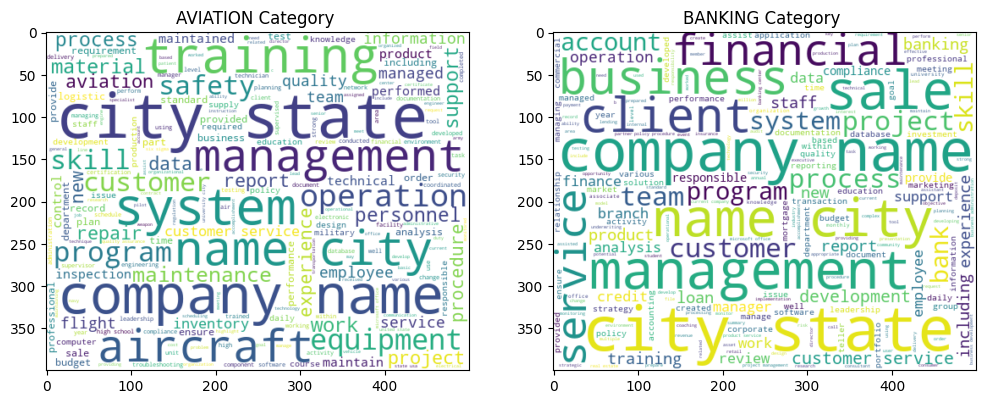

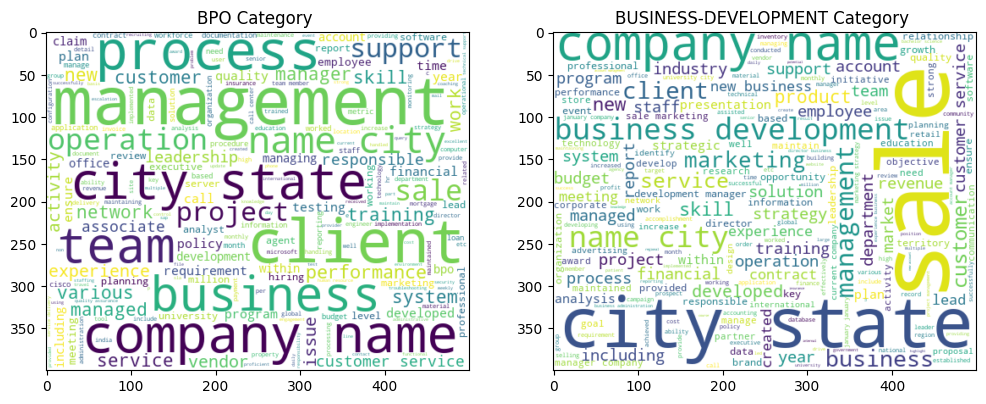

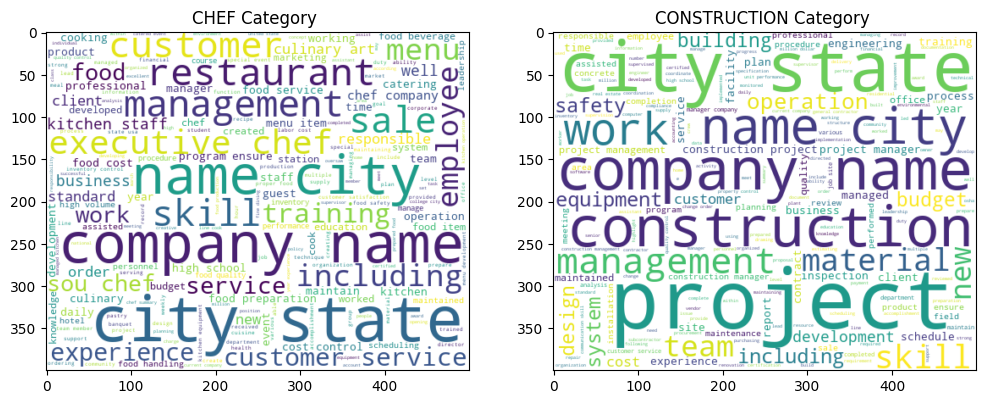

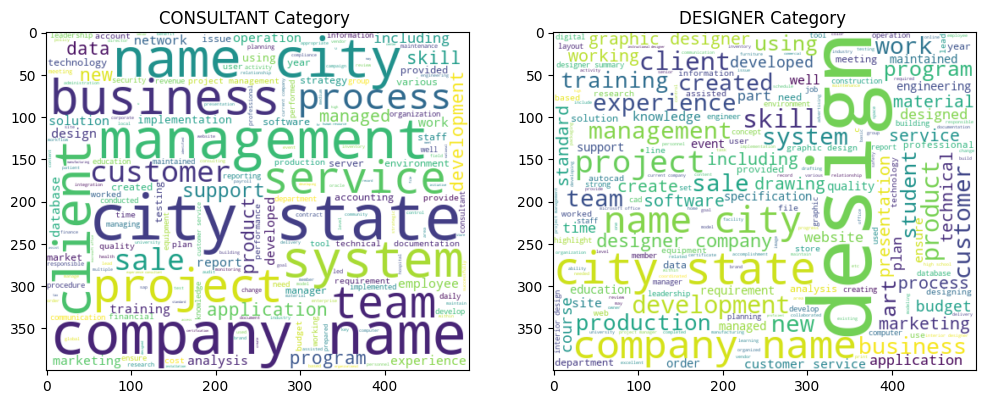

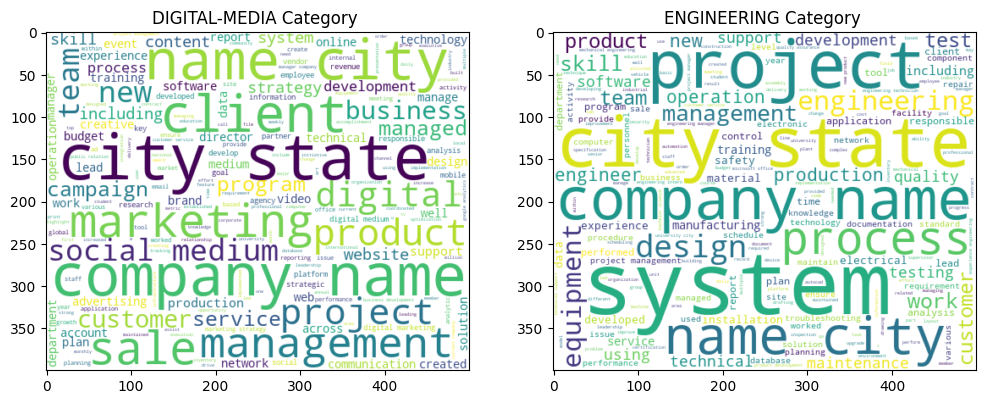

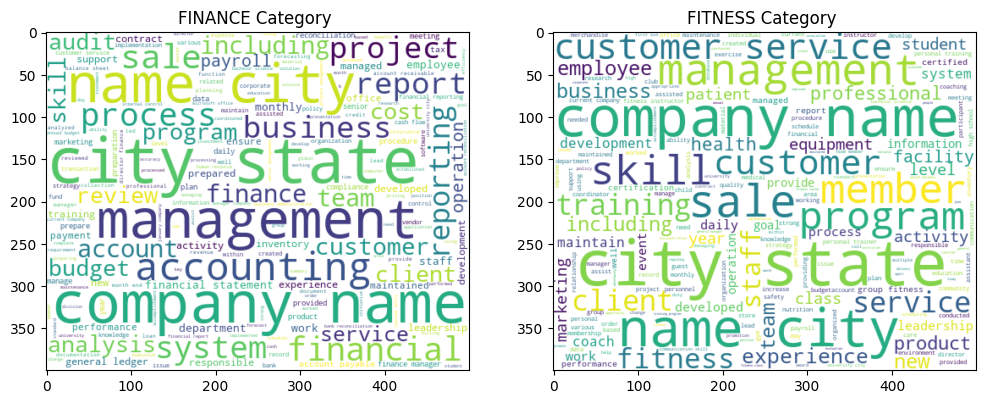

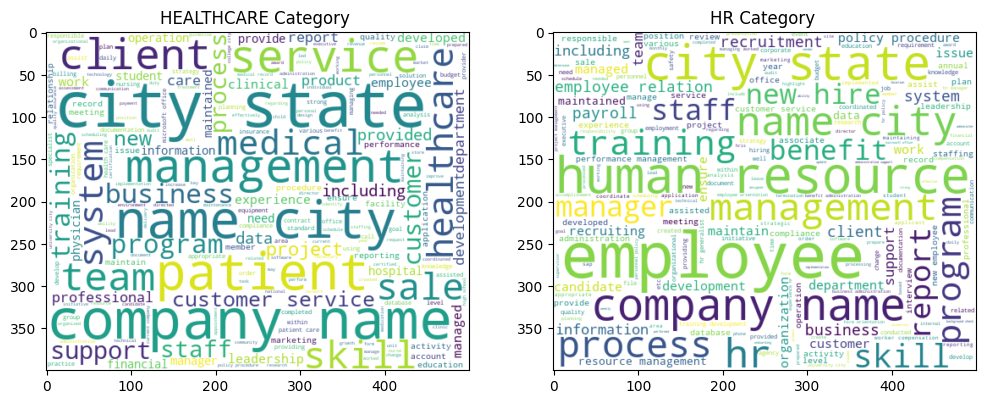

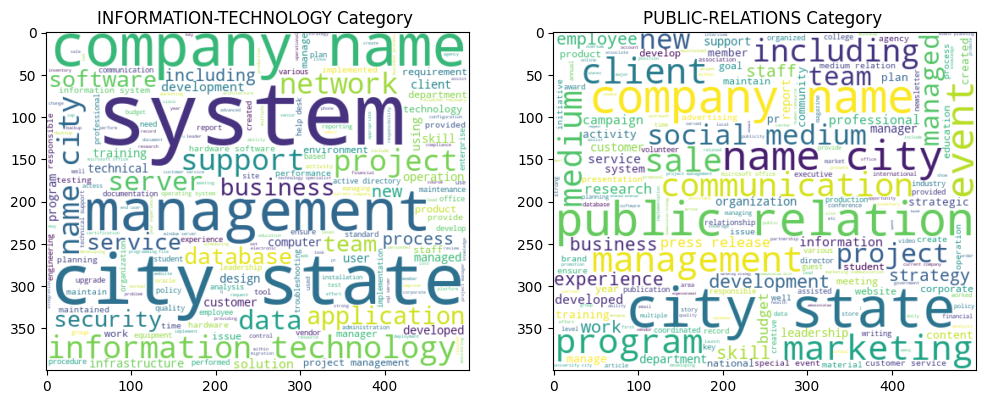

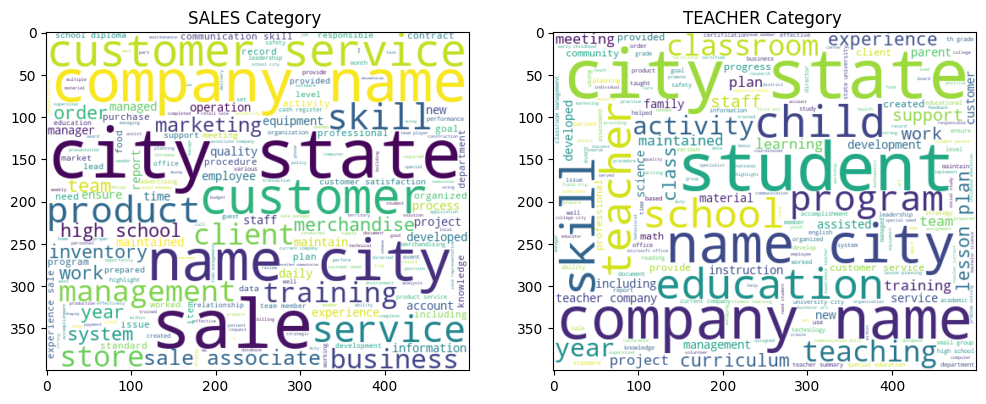

In [120]:
for i in range(0, len(df_categories), 2):  # increase by 2
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    for j in range(2):
        if i + j < len(df_categories): # if avoid the out of boundry if the count is odd like 25
            df_cate = df_categories[i + j]
            text = ' '.join(df_cate["Text"])
            wordcloud = WordCloud(width=500, height=400, background_color='white').generate(text)
            axes[j].imshow(wordcloud, interpolation="bilinear")
            axes[j].set_title(f"{categories[i + j]} Category ")
    plt.show()